In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from scipy.optimize import curve_fit
%matplotlib inline
import os
import math
import scipy.integrate as integrate

In [2]:
filename = '/home/xams/xams/PMT12_gain/K_series/K1000.hdf5'
if not os.path.exists(filename):
    raise FileNotFoundError("not found")
    
store = pd.HDFStore(filename)
data= store['all_hits']
datapmt1 = data[data['channel'] == 3]
datapmt2 = data[data['channel'] == 0]
melecs1 = datapmt1['area']/1e6
melecs2 = datapmt2['area']/1e6

print(len(datapmt1))

1018304


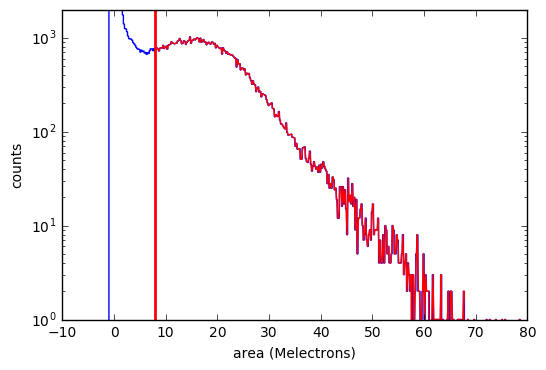

In [25]:
histboundaries = [-1,80]
histbinwidth = 0.2
fitstart = 8
ymax = 2000
histbins = np.arange(histboundaries[0], histboundaries[1]+histbinwidth/2.0, histbinwidth)
centers = np.arange(histboundaries[0]+histbinwidth/2.0, histboundaries[1], histbinwidth)
centerscut = [c for c in centers if c>=fitstart]

hist = plt.hist(melecs2, bins=histbins, histtype='step', color = 'blue')
counts = hist[0]
countscut = counts[-len(centerscut):]
countserr= [np.sqrt(t)+0.5 for t in counts]
countserrcut  = countserr[-len(centerscut):]
plt.plot(centerscut, countscut, color = 'red')

plt.xlabel("area (Melectrons)")
plt.ylabel("counts")
plt.axvline(x = fitstart, linewidth = 2, color = 'red')
plt.yscale('log')
plt.ylim(0,ymax)
plt.show()


[ 929.17273662   14.20838637    9.35283715]


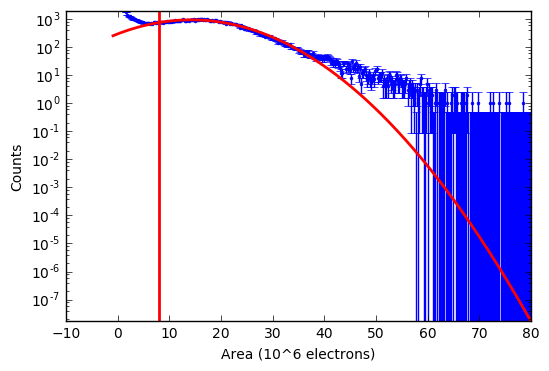

In [26]:
def gauss(x, a1, b1, s1):
    return a1 * np.exp(-(x-b1)**2/(2*s1**2))

def xgauss(x, a1, b1, s1):
    return a1 * x * np.exp(-(x-b1)**2/(2*s1**2))

ag = 80
bg = 17
sg = 4

popt, pcov = curve_fit(gauss, centerscut, countscut, sigma = countserrcut, p0=[ag, bg, sg])
perr = np.sqrt(np.diag(pcov))
af, bf, sf = popt

print(popt)

fitcounts = [gauss(t, popt[0], popt[1], popt[2]) for t in centers]
gescounts = [gauss(t, ag, bg, sg) for t in centers]

plt.errorbar(centers, counts, yerr = countserr, fmt = '.', markersize = 4)
plt.plot(centers, fitcounts, color='red', linewidth = 2)

# plt.plot(centers, gescounts, color='black', linewidth = 1)
plt.xlabel("Area (10^6 electrons)")
plt.ylabel("Counts")
plt.axvline(x = fitstart, linewidth = 2, color = 'red')
plt.yscale('log')
plt.xlim()
plt.ylim(0,ymax)
plt.savefig('0875vpmt2gauss', format='eps')
plt.show()

In [23]:
totalgral = integrate.quad(gauss, 0, np.inf, args = (af, bf, sf))[0]
totalsignal = totalgral / histbinwidth
avggain = integrate.quad(xgauss, 0, np.inf, args = (af, bf, sf))[0]/totalgral
print('totalsignal = ', totalsignal)
print('Poisson stat = ', totalsignal / len(datapmt1))
print('avggain = ', avggain)

totalsignal =  101805.86194124825
Poisson stat =  0.09997590301250732
avggain =  15.473499018468678
